# Project 1 Database analysis on Bone Marrow Transplant in Children
### A work by Lucía Schmidt and Gabriela Gutiérrez-Colomer 

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

We load our data in .csv format and store it in a dataframe called "data".
Our database has to deal with bone marrow transplant in children

In [2]:
data = pd.read_csv("csv_result-bone-marrow.csv")  #Load data

pd.set_option('display.max_columns', None)  #Avoid python truncating dataset and showing all columns.
pd.set_option('display.max_rows', None)

In [3]:
#data.head(20) # We show the first n rows and all columns. 
data

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3,10/10,matched,0,0,matched,high,peripheral_blood,no,7.200,5.38,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0,10/10,matched,0,0,matched,low,bone_marrow,no,4.500,0.41,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2,10/10,matched,0,0,matched,low,bone_marrow,no,7.940,0.42,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1,10/10,matched,0,0,matched,low,bone_marrow,no,4.250,0.14,29.481647,23.0,29.0,yes,yes,19.0,?,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0,9/10,matched,2,1,one_antigen,high,peripheral_blood,no,51.850,13.05,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0
5,6,27.391781,yes,AB,?,8.9,yes,5_10,male,40.0,0,plus,present,chronic,malignant,other,mismatched,?,10/10,matched,0,0,matched,high,bone_marrow,yes,3.270,0.39,8.412758,16.0,70.0,no,no,1000000.0,no,no,2800.0,0
6,7,34.520548,yes,0,absent,14.4,no,10_20,female,51.0,A,minus,?,AML,malignant,other,mismatched,?,10/10,matched,0,0,matched,low,peripheral_blood,no,17.780,7.39,2.406248,17.0,29.0,yes,yes,18.0,?,no,41.0,1
7,8,21.435616,yes,0,present,18.2,no,10_20,male,56.0,A,plus,absent,nonmalignant,nonmalignant,other,mismatched,1,7/10,mismatched,2,3,mismatched,low,bone_marrow,no,6.410,?,?,22.0,58.0,yes,yes,22.0,?,no,45.0,1
8,9,32.641096,yes,AB,absent,7.9,yes,5_10,male,20.5,0,plus,present,nonmalignant,nonmalignant,other,mismatched,2,10/10,matched,0,0,matched,low,peripheral_blood,no,23.540,6.24,3.772555,15.0,14.0,no,no,1000000.0,no,no,671.0,0
9,10,28.783562,yes,A,absent,4.7,yes,0_5,male,16.5,0,plus,present,nonmalignant,nonmalignant,female_to_male,mismatched,2,9/10,matched,1,2,DRB1_cell,low,peripheral_blood,no,7.690,7.43,1.035244,16.0,17.0,yes,no,1000000.0,no,no,676.0,0


## 1. Data Description -Bone Marrow Transplant in Children-

In [4]:
print(data.shape)  #Printing the shape of our database.

(187, 38)


PATIENTS: 187 

VARIABLES: 38

In [5]:
data.columns  #Printing columns/variables of our feature vector.

Index(['id', 'donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status'],
      dtype='object')

In [6]:
data.describe(include='all')  # Generates a descriptive statistical analysis of numerical AND categorical data.

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
count,187.000000,187.000000,187,187,187,187.000000,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187.000000,187,187,187.000000,187.000000,187,187,187.000000,187,187,187.000000,187.000000
unique,NaN,NaN,2,4,3,NaN,2,3,2,131,5,3,3,5,2,2,3,5,4,2,5,6,7,2,2,2,NaN,164,183,NaN,NaN,2,2,NaN,3,2,NaN,NaN
top,NaN,NaN,yes,0,absent,NaN,yes,10_20,male,23.0,A,plus,present,ALL,malignant,other,mismatched,2,10/10,matched,0,0,matched,low,peripheral_blood,no,NaN,?,?,NaN,NaN,yes,no,NaN,no,no,NaN,NaN
freq,NaN,NaN,104,73,113,NaN,99,89,112,5,75,158,100,68,155,155,134,57,94,159,93,93,94,118,145,164,NaN,5,5,NaN,NaN,112,147,NaN,128,159,NaN,NaN
mean,94.000000,33.472068,NaN,NaN,NaN,9.931551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.891781,NaN,NaN,26752.866310,90937.919786,NaN,NaN,775408.042781,NaN,NaN,938.743316,0.454545
std,54.126395,8.271826,NaN,NaN,NaN,5.305639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.914386,NaN,NaN,161747.200525,288242.407688,NaN,NaN,418425.252689,NaN,NaN,849.589495,0.499266
min,1.000000,18.646575,NaN,NaN,NaN,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790000,NaN,NaN,9.000000,9.000000,NaN,NaN,10.000000,NaN,NaN,6.000000,0.000000
25%,47.500000,27.039726,NaN,NaN,NaN,5.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.350000,NaN,NaN,13.000000,16.000000,NaN,NaN,1000000.000000,NaN,NaN,168.500000,0.000000
50%,94.000000,33.550685,NaN,NaN,NaN,9.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.720000,NaN,NaN,15.000000,21.000000,NaN,NaN,1000000.000000,NaN,NaN,676.000000,0.000000
75%,140.500000,40.117808,NaN,NaN,NaN,14.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.415000,NaN,NaN,17.000000,37.000000,NaN,NaN,1000000.000000,NaN,NaN,1604.000000,1.000000


Here we can extract many useful metrics, such as the most frequent output for "donor_AB0" that is blood group 0 with a frequency of 73 patients with it. Also, we can see that the minimum donor age is 18 years and the maximum is 55. Interesting is also the fact that the most common output for "AB0_match" is a mismatch. 
This information helps us by providing statistical metrics.

In [7]:
data.dtypes  #Printing types of variables.

id                             int64
donor_age                    float64
donor_age_below_35            object
donor_ABO                     object
donor_CMV                     object
recipient_age                float64
recipient_age_below_10        object
recipient_age_int             object
recipient_gender              object
recipient_body_mass           object
recipient_ABO                 object
recipient_rh                  object
recipient_CMV                 object
disease                       object
disease_group                 object
gender_match                  object
ABO_match                     object
CMV_status                    object
HLA_match                     object
HLA_mismatch                  object
antigen                       object
allel                         object
HLA_group_1                   object
risk_group                    object
stem_cell_source              object
tx_post_relapse               object
CD34_x1e6_per_kg             float64
C

38 varibles: 

-9 are int/float 

-29 are objects

Many of these variables seem to be objects, but taking into account that have numerical aspect, we can convert them into floats to implement linear operations on them.

## 2. Missing Values

### Do we have missing values? What variables deal with them?

In [8]:
(data == '?').sum(axis=0)

C:\Users\schmi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                            0
donor_age                     0
donor_age_below_35            0
donor_ABO                     0
donor_CMV                     2
recipient_age                 0
recipient_age_below_10        0
recipient_age_int             0
recipient_gender              0
recipient_body_mass           2
recipient_ABO                 1
recipient_rh                  2
recipient_CMV                14
disease                       0
disease_group                 0
gender_match                  0
ABO_match                     1
CMV_status                   16
HLA_match                     0
HLA_mismatch                  0
antigen                       1
allel                         1
HLA_group_1                   0
risk_group                    0
stem_cell_source              0
tx_post_relapse               0
CD34_x1e6_per_kg              0
CD3_x1e8_per_kg               5
CD3_to_CD34_ratio             5
ANC_recovery                  0
PLT_recovery                  0
acute_Gv

Indeed we have missing values in our database. We have to consider each case in order to find the best approach to each case.

As we can see, **donor_CMV, recipient_body_mass, recipient_ABO, recipient_rh, recipient_CMV, ABO_match, CMV_status,CD3_x1e8_per_kg,CD3_to_CD34_ratio** and **extensive_chronic_GvHD** have null values.  

### What can we do to eliminate them?

We can eliminate patients as well as variables.

The varibale **extensive_chronic_GvHD** has too many missing values for us to find a suitable predictor. We choose to eliminate this variable taking into account how this affects our model.

In [9]:
data = data.drop('extensive_chronic_GvHD',axis = 1)

On the other hand, to deal with the rest of missing values, what we are going to do first is to eliminate the patients who have them. We will eliminate them so that we can get proper prediction models and statistical metrics.  But,  why do we need a predictor? Some of the null values belong to variables whose values can be predicted. In these cases, the most sensible thing to do is to predict them and replace the null values. 

Other variables,require another type of techniques. The options considered have been: replacing the null values by the median (cases of categorical data) or replacing the null value by its mean (cases of variables that do not have a strong linear relationship and are not candidates for prediction).

In [10]:
# We drop patients with missing values so that they dont influence the predictor
data = data.drop([5,6,7,18,27,30,43,75,81,86,92,93,102,103,105,112,128,129,137,147,149,150,186],axis = 0)

In order to apply mathematical computations, our variables must be numerical:

In [11]:
data["recipient_body_mass"] = data.recipient_body_mass.astype(float)
#data["CMV_status"] = data.CMV_status.astype(float)
data["antigen"] = data.antigen.astype(float)
data["allel"] = data.allel.astype(float)
data["CD3_x1e8_per_kg"]=data.CD3_x1e8_per_kg.astype(float)
data["CD3_to_CD34_ratio"]=data.CD3_to_CD34_ratio.astype(float)

#### Predictions

In [12]:
# Predictor for recipient_body_mass, antigen and allel.

import statsmodels.api as sm

def predictor(x_var, y_var, indep, decimals):
    x = data[x_var]
    y = data[y_var]
    X = sm.add_constant(x)
    model = sm.OLS(y,X)
    results = model.fit()
    #display(results.summary())
    indep_variable = float(indep)
    dep_variable = results.predict([1, indep_variable])
    y_hat = results.predict(X)
    plt.scatter(x,y,alpha=0.1)
    plt.plot(x,y_hat,'r')
    plt.plot(indep_variable, dep_variable,'g*',markersize = 14)
    plt.xlabel(str(x_var))
    plt.ylabel(str(y_var))
    plt.title('Regression Line ')
    plt.show()

    predicted = dep_variable[0].round(decimals)
    print('The estimated value is', predicted)
    return predicted


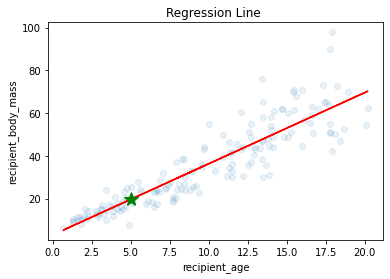

The estimated value is 19.6


In [13]:
# Predicton of recipient_body_mass from recipient_age, as correlation is 0.90.
predicted_bmi_pat93 = predictor('recipient_age', 'recipient_body_mass', 5.0, 1)

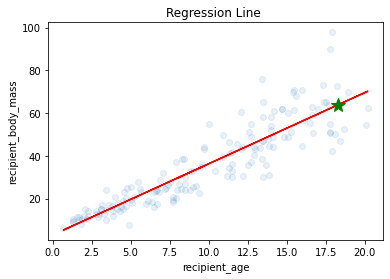

The estimated value is 63.9


In [14]:
# Predicton of recipient_body_mass from recipient_age, as correlation is 0.90.
predicted_bmi_pat103 = str(predictor('recipient_age', 'recipient_body_mass', 18.3, 1))

In [15]:
numerical_change = {"HLA_group_1":{"matched":1,"mismatched":0,"one_antigen":2,"DRB1_cell":3,"one_allel":4,"two_diffs":5,
                    "three_diffs":5}}
data = data.replace(numerical_change) 

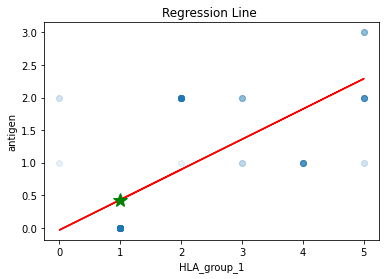

The estimated value is 0.0


In [16]:
# Predict antigen patient 187 out of HLA_group_1.
predicted_antigen_pat187 = str(predictor('HLA_group_1', 'antigen', 1, 0))  # matched = 1

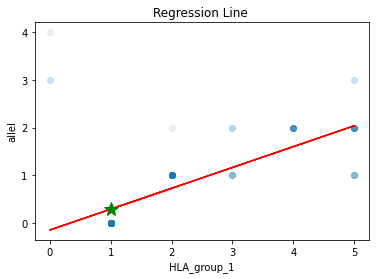

The estimated value is 0.0


In [17]:
# Predict allel patient 187 out of HLA_group_1.
predicted_allel_pat187 = str(predictor('HLA_group_1', 'allel', 1, 0))  # matched = 1

#### Mean and median

In [18]:
data.describe(include = 'all')

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time,survival_status
count,164.000000,164.000000,164,164,164,164.000000,164,164,164,164.000000,164,164,164,164,164,164,164,164,164,164,164.000000,164.000000,164.000000,164,164,164,164.000000,164.000000,164.000000,164.000000,164.000000,164,164,164.000000,164,164.000000,164.000000
unique,NaN,NaN,2,4,2,NaN,2,3,2,NaN,4,2,2,5,2,2,2,4,4,2,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2,NaN,2,NaN,NaN
top,NaN,NaN,yes,A,absent,NaN,yes,10_20,male,NaN,A,plus,present,ALL,malignant,other,mismatched,2,10/10,matched,NaN,NaN,NaN,low,peripheral_blood,no,NaN,NaN,NaN,NaN,NaN,yes,no,NaN,no,NaN,NaN
freq,NaN,NaN,90,65,100,NaN,87,78,99,NaN,64,140,95,60,136,137,115,55,81,140,NaN,NaN,NaN,104,128,145,NaN,NaN,NaN,NaN,NaN,100,129,NaN,138,NaN,NaN
mean,94.780488,33.462646,NaN,NaN,NaN,9.757317,NaN,NaN,NaN,35.474390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.926829,0.756098,2.067073,NaN,NaN,NaN,11.870018,4.632805,5.502774,18307.548780,67101.689024,NaN,NaN,780494.469512,NaN,994.146341,0.426829
std,54.381525,8.080085,NaN,NaN,NaN,5.236177,NaN,NaN,NaN,19.355457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994222,0.880058,1.449058,NaN,NaN,NaN,9.554489,3.658901,10.041788,134416.091419,250907.163051,NaN,NaN,415171.299357,NaN,846.937516,0.496132
min,1.000000,18.646575,NaN,NaN,NaN,0.700000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.790000,0.040000,0.309048,10.000000,10.000000,NaN,NaN,10.000000,NaN,6.000000,0.000000
25%,48.750000,27.594520,NaN,NaN,NaN,4.975000,NaN,NaN,NaN,18.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,5.430000,1.732500,1.819808,13.000000,15.750000,NaN,NaN,1000000.000000,NaN,201.500000,0.000000
50%,93.500000,33.454794,NaN,NaN,NaN,9.500000,NaN,NaN,NaN,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,9.770000,4.325000,2.733703,15.000000,21.000000,NaN,NaN,1000000.000000,NaN,795.500000,0.000000
75%,142.250000,39.776713,NaN,NaN,NaN,13.925000,NaN,NaN,NaN,49.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,3.000000,NaN,NaN,NaN,15.412500,6.567500,5.766468,17.000000,30.500000,NaN,NaN,1000000.000000,NaN,1690.500000,1.000000


In [19]:
mean_CD3_kg = data['CD3_x1e8_per_kg'].describe().loc['mean']
mean_CD3_ratio = data['CD3_to_CD34_ratio'].describe().loc['mean']

In [20]:
median_donorCMV = data['donor_CMV'].describe().loc['top']
median_reciAB0 = data['recipient_ABO'].describe().loc['top']
median_reci_rh = data['recipient_rh'].describe().loc['top']
median_reciCMV = data['recipient_CMV'].describe().loc['top']
median_AB0_match = data['ABO_match'].describe().loc['top']
median_CMVstatus = data['CMV_status'].describe().loc['top']

In [21]:
mean_CD3_kg, mean_CD3_ratio, median_donorCMV, median_reciAB0, median_reci_rh, median_reciCMV, median_AB0_match, median_CMVstatus

(4.632804878048779,
 5.5027735548780505,
 'absent',
 'A',
 'plus',
 'present',
 'mismatched',
 '2')

Now, we have the predictions for some missing values, the mean and the median for others. We need to replace them now in our dataset. As we have deleated patients with missing values earlier, we need to rerun our original dataset and replace them there.

#### Load our original dataset and replace

In [22]:
data = pd.read_csv("csv_result-bone-marrow.csv")  #Load data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
data = data.drop('extensive_chronic_GvHD',axis = 1)  #drop variable with 31 missing values

Replacing:

In [24]:
data['recipient_body_mass'][92] = data['recipient_body_mass'][92].replace('?', str(predicted_bmi_pat93))

<ipython-input-24-ff0850a6e429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recipient_body_mass'][92] = data['recipient_body_mass'][92].replace('?', str(predicted_bmi_pat93))


In [25]:
data['recipient_body_mass'][102] = data['recipient_body_mass'][102].replace('?', str(predicted_bmi_pat103))

<ipython-input-25-1c95bde3b2a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recipient_body_mass'][102] = data['recipient_body_mass'][102].replace('?', str(predicted_bmi_pat103))


In [26]:
data['antigen'][186] = data['antigen'][186].replace('?', str(predicted_antigen_pat187))

<ipython-input-26-5ea796b1e2c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['antigen'][186] = data['antigen'][186].replace('?', str(predicted_antigen_pat187))


In [27]:
data['allel'][186] = data['allel'][186].replace('?', str(predicted_allel_pat187))

<ipython-input-27-87193d4b1f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['allel'][186] = data['allel'][186].replace('?', str(predicted_allel_pat187))


In [28]:
data['CD3_x1e8_per_kg'] = data['CD3_x1e8_per_kg'].replace('?', str(mean_CD3_kg))
data['CD3_to_CD34_ratio'] = data['CD3_to_CD34_ratio'].replace('?', str(mean_CD3_ratio))

In [29]:
data['donor_CMV'] = data['donor_CMV'].replace('?', str(median_donorCMV))
data['recipient_ABO'] = data['recipient_ABO'].replace('?', str(median_reciAB0))
data['recipient_rh'] = data['recipient_rh'].replace('?', str(median_reci_rh))
data['recipient_CMV'] = data['recipient_CMV'].replace('?', str(median_reciCMV))
data['ABO_match'] = data['ABO_match'].replace('?', str(median_AB0_match))
data['CMV_status'] = data['CMV_status'].replace('?', str(median_CMVstatus))

Ensure we don't have any missing values

In [30]:
(data == '?').sum(axis=0)

C:\Users\schmi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                           0
donor_age                    0
donor_age_below_35           0
donor_ABO                    0
donor_CMV                    0
recipient_age                0
recipient_age_below_10       0
recipient_age_int            0
recipient_gender             0
recipient_body_mass          0
recipient_ABO                0
recipient_rh                 0
recipient_CMV                0
disease                      0
disease_group                0
gender_match                 0
ABO_match                    0
CMV_status                   0
HLA_match                    0
HLA_mismatch                 0
antigen                      0
allel                        0
HLA_group_1                  0
risk_group                   0
stem_cell_source             0
tx_post_relapse              0
CD34_x1e6_per_kg             0
CD3_x1e8_per_kg              0
CD3_to_CD34_ratio            0
ANC_recovery                 0
PLT_recovery                 0
acute_GvHD_II_III_IV         0
acute_Gv

Now we have successfully replaced all missing values.

## 3. Database description after modifications

Our dataset has changed due to our modifications in the previous cells, now we need to convert variables to numerical data in order to further analyse them.

In [31]:
data["recipient_body_mass"] = data.recipient_body_mass.astype(float)
data["CMV_status"] = data.CMV_status.astype(float)
data["antigen"] = data.antigen.astype(float)
data["allel"] = data.allel.astype(float)
data["CD3_x1e8_per_kg"]=data.CD3_x1e8_per_kg.astype(float)
data["CD3_to_CD34_ratio"]=data.CD3_to_CD34_ratio.astype(float)

In [32]:
numerical_change = {"donor_age_below_35":     {"yes": 1, "no": 0},
                    "donor_CMV": {"present": 1, "absent":0},
                   "recipient_age_below_10":{"yes": 1, "no": 0},
                   "relapse":{"yes":1, "no":0}, 
                   "acute_GvHD_II_III_IV": {"yes":1, "no":0},
                   "acute_GvHD_III_IV": {"yes":1, "no":0},
                   "recipient_gender": {"female":1, "male":2},
                   "donor_ABO":{"A":1,"B":2,"AB":3,"0":4},
                   "recipient_ABO":{"A":1,"B":2,"AB":3,"0":4},
                   "recipient_rh":{"plus":1,"minus":0},
                   "disease":{"ALL":1,"AML":2,"chronic":3,"nonmalignant":0,"lymphoma":4},
                   "recipient_CMV":{"present":1,"absent":0},
                   "disease_group":{"malignant":1,"nonmalignant":0},
                   "gender_match":{"other":1,"female_to_male":0},
                   "ABO_match":{"matched":1, "mismatched":0},
                   "HLA_match":{"10/10":1,"9/10":0.9,"7/10":0.7,"8/10":0.8},
                   "HLA_mismatch":{"matched":1, "mismatched":0},
                   "HLA_group_1":{"matched":1,"mismatched":0,"one_antigen":2,"DRB1_cell":3,"one_allel":4,"two_diffs":5,
                    "three_diffs":5},
                    "risk_group":{"high":1,"low":0},
                    "stem_cell_source":{"peripheral_blood":1,"bone_marrow":2},
                   "tx_post_relapse":{"no":0,"yes":1},
                   "acute_GvGH_II_III_IV":{"yes":1,"no":0},
                   "acute_GvGH_III_IV":{"yes":1,"no":0},
                   "recipient_age_int":{"5_10":1,"0_5":0,"10_20":2}}

In [33]:
data = data.replace(numerical_change)  # We print the database and we can see that all values are changed. 

In [34]:
data.dtypes

id                             int64
donor_age                    float64
donor_age_below_35             int64
donor_ABO                      int64
donor_CMV                      int64
recipient_age                float64
recipient_age_below_10         int64
recipient_age_int              int64
recipient_gender               int64
recipient_body_mass          float64
recipient_ABO                  int64
recipient_rh                   int64
recipient_CMV                  int64
disease                        int64
disease_group                  int64
gender_match                   int64
ABO_match                      int64
CMV_status                   float64
HLA_match                    float64
HLA_mismatch                   int64
antigen                      float64
allel                        float64
HLA_group_1                    int64
risk_group                     int64
stem_cell_source               int64
tx_post_relapse                int64
CD34_x1e6_per_kg             float64
C

Now that we have converted all our data into numerical data, we can start processing and analysing it. We start by using again the describe function.

In [35]:
data.describe()  # Generates a descriptive statistical analysis, expluding Nan values (if some).

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.000000,33.472068,0.556150,2.481283,0.385027,9.931551,0.529412,1.224599,1.598930,35.864706,2.176471,0.855615,0.609626,1.631016,0.828877,0.828877,0.278075,1.550802,0.932620,0.850267,0.919786,0.748663,2.010695,0.368984,1.224599,0.122995,11.891781,4.742695,5.388243,26752.866310,90937.919786,0.598930,0.213904,775408.042781,0.149733,938.743316,0.454545
std,54.126395,8.271826,0.498171,1.341409,0.487908,5.305639,0.500474,0.824904,0.491431,19.689044,1.216324,0.352423,0.489144,1.162913,0.377627,0.377627,0.449253,1.088225,0.079346,0.357767,0.999454,0.889567,1.440539,0.483825,0.418438,0.329313,9.914386,3.806948,9.468841,161747.200525,288242.407688,0.491431,0.411161,418425.252689,0.357767,849.589495,0.499266
min,1.000000,18.646575,0.000000,1.000000,0.000000,0.600000,0.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.790000,0.040000,0.204132,9.000000,9.000000,0.000000,0.000000,10.000000,0.000000,6.000000,0.000000
25%,47.500000,27.039726,0.000000,1.000000,0.000000,5.050000,0.000000,0.500000,1.000000,19.250000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.900000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.350000,1.725000,1.809375,13.000000,16.000000,0.000000,0.000000,1000000.000000,0.000000,168.500000,0.000000
50%,94.000000,33.550685,1.000000,2.000000,0.000000,9.600000,1.000000,1.000000,2.000000,33.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9.720000,4.470000,2.780611,15.000000,21.000000,1.000000,0.000000,1000000.000000,0.000000,676.000000,0.000000
75%,140.500000,40.117808,1.000000,4.000000,1.000000,14.050000,1.000000,2.000000,2.000000,50.700000,4.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,15.415000,6.575000,5.771418,17.000000,37.000000,1.000000,0.000000,1000000.000000,0.000000,1604.000000,1.000000
max,187.000000,55.553425,1.000000,4.000000,1.000000,20.200000,1.000000,2.000000,2.000000,103.400000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,5.000000,1.000000,2.000000,1.000000,57.780000,20.020000,99.560970,1000000.000000,1000000.000000,1.000000,1.000000,1000000.000000,1.000000,3364.000000,1.000000


In [36]:
data.nunique()  # Gives us the total number of unique values per variable

# Useful: for example in "id" we have 187 different outputs and that makes sense because if we have 2 identical ids 
# we are reffering to the same person and that is not how it works. 

id                           187
donor_age                    187
donor_age_below_35             2
donor_ABO                      4
donor_CMV                      2
recipient_age                125
recipient_age_below_10         2
recipient_age_int              3
recipient_gender               2
recipient_body_mass          131
recipient_ABO                  4
recipient_rh                   2
recipient_CMV                  2
disease                        5
disease_group                  2
gender_match                   2
ABO_match                      2
CMV_status                     4
HLA_match                      4
HLA_mismatch                   2
antigen                        4
allel                          5
HLA_group_1                    6
risk_group                     2
stem_cell_source               2
tx_post_relapse                2
CD34_x1e6_per_kg             183
CD3_x1e8_per_kg              164
CD3_to_CD34_ratio            183
ANC_recovery                  18
PLT_recove

In [37]:
data["survival_status"].value_counts() 

0    102
1     85
Name: survival_status, dtype: int64

We have 85 deaths and 102 alive patients. 
Although there is an appreciable difference in the number of different outcomes, we consider our data balanced in this sense.

## 4. Analyzing Feature Patterns using Visualization

### Histogram

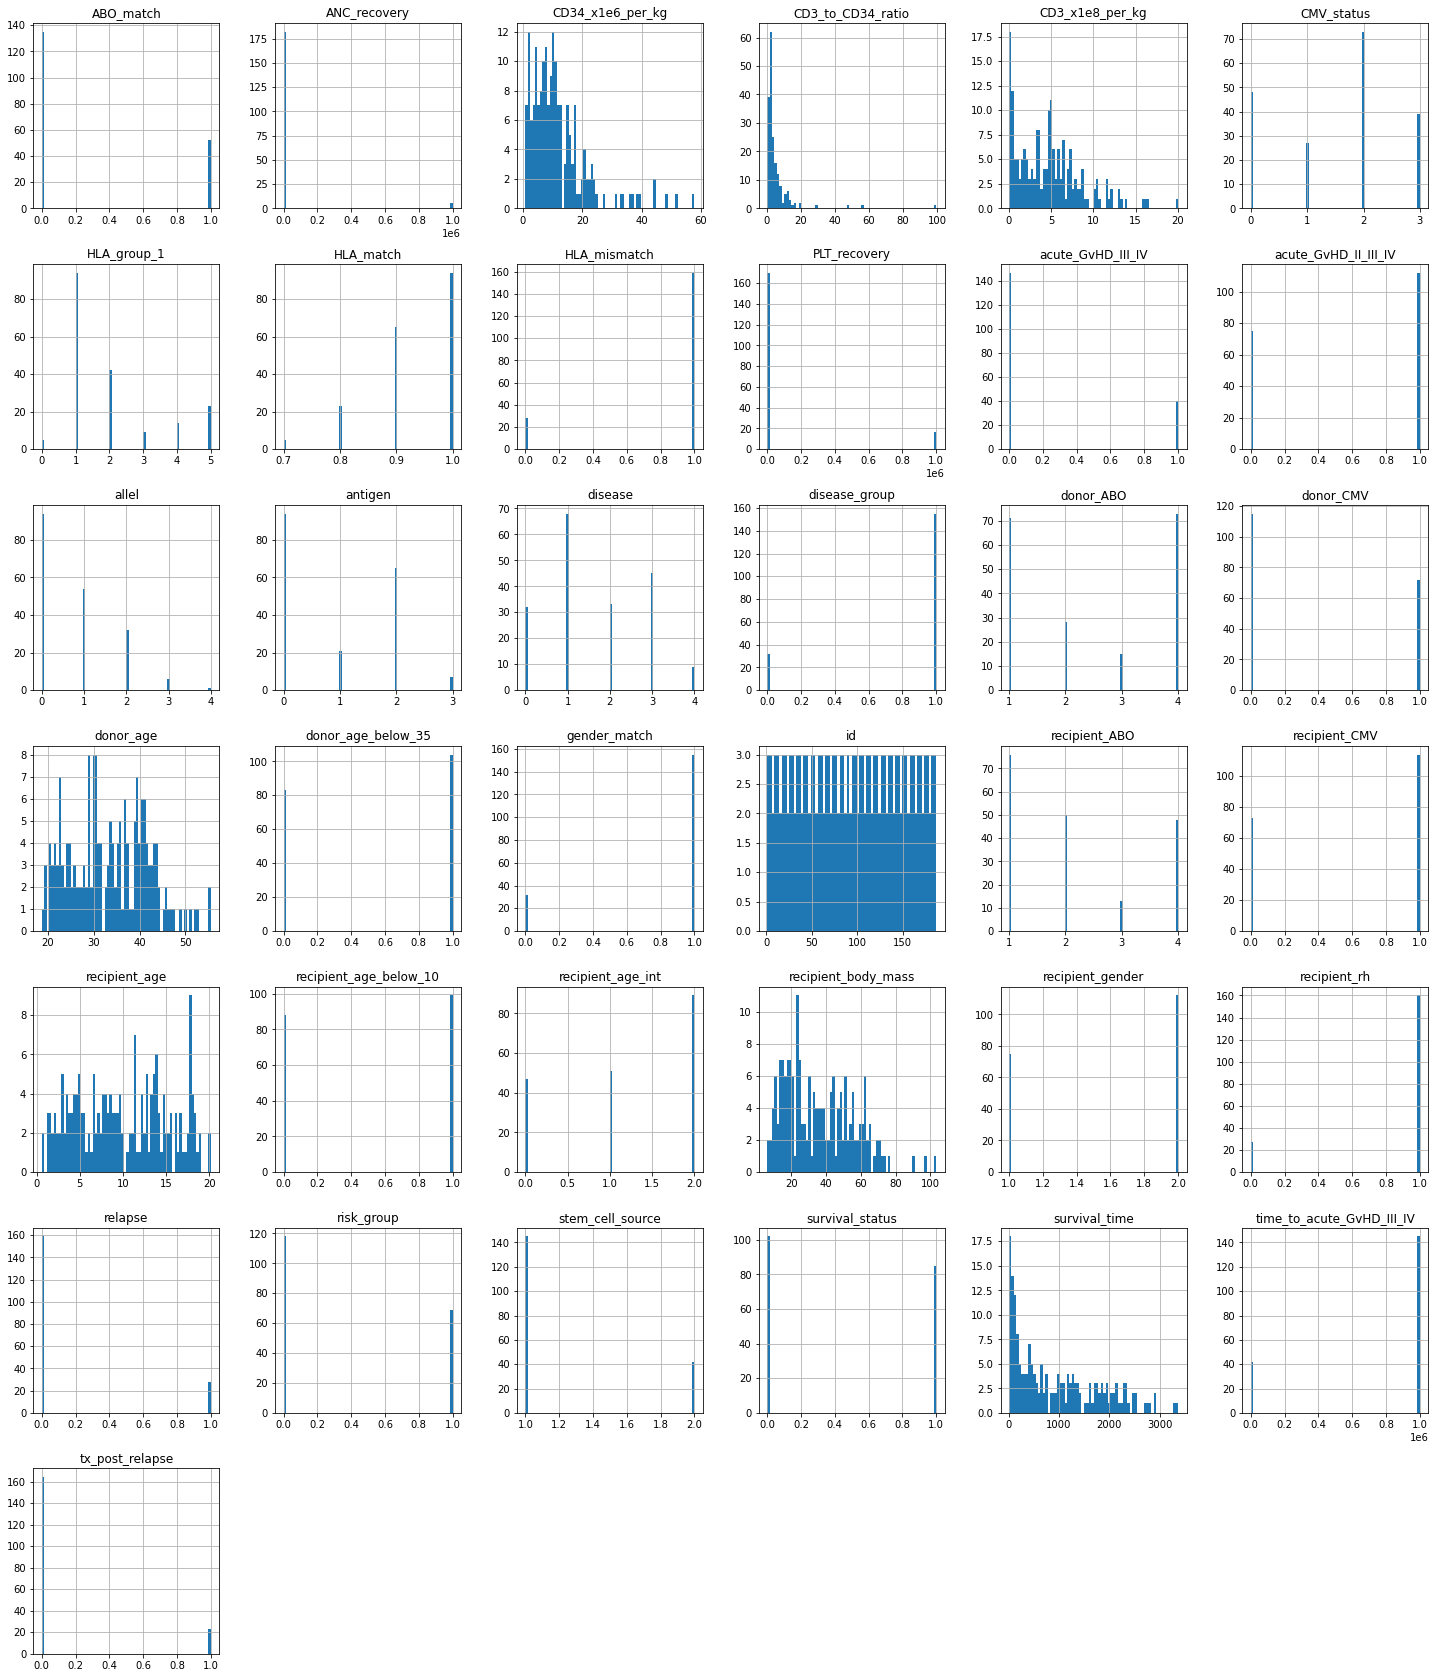

In [38]:
data.hist(figsize=(25, 30), bins=70, xlabelsize=10, ylabelsize=10);  #only type float/int variables
# figsize tell us the size of the figure, in this case 25x30 (width, height). 

Thanks to histograms, we can see the distributions of the variables. 

Histograms are in alphabetical order.

There are histograms that do not make sense and have to be discarded, e.g. histogram for "id".

Regarding "donor_age", we can see its distribution and that most outcomes are between 20 and 40 years. On the other hand "recipient_age" is more uniformly distributed between 0 and 20although we see that the majority of recipients are 10 years old or less.

Interesting is also the distribution of "recipient_body_mass", seeing a clear concentration between 10 and 45 kg/m^2.

Lastly, we want to remark the histogram of "survival_time". This variable has two different outputs: time ofobservation (if alive) or time to event (if dead) in days. This is why, the observation of this variable only makes sense in realitionship with the "survival_status". Therefore, its histogram doesn´t provide any useful information.

We can now, analyse histograms separatedly.

### a) Histogram to reflect the different blood groups

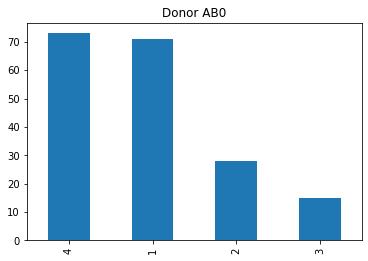

In [39]:
data['donor_ABO'].value_counts().plot.bar(title="Donor AB0")

As we converted the categorical variable "donor_AB0" into a numerical variable, now we have to recall what each number ment at the beginning: donor_ABO: {"A":1,"B":2,"AB":3,"0":4}. As we can see there are more donors with blood group A that B, AB or 0.

### b) Histogram to reflect the recipient gender

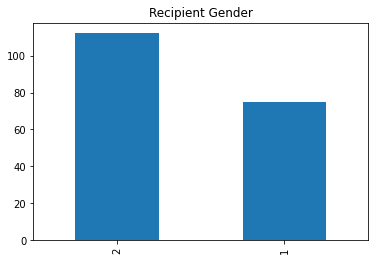

In [40]:
data['recipient_gender'].value_counts().plot.bar(title="Recipient Gender")

The histogram tell us that we have more men (2) recipients than women (1). 

### c) Histogram to show if there is a relapse after the transplant

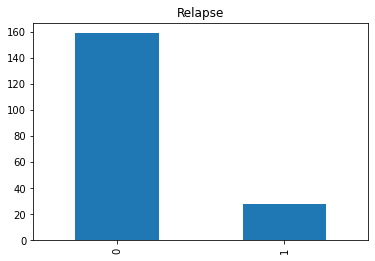

In [41]:
data['relapse'].value_counts().plot.bar(title="Relapse")

The histogram shows that the majority do not relapse. Can be an indicator for correct transplantation techniques.

### d) Boxplots 

We have encountered some outliers in some variables. Exactly, the variables "ANC_recovery", "PLT_recovery" and "time_to_acute_GvHD_III_IV" have values of 1,000,000 which at first don´t make very much sense. After analysing this fact, we came to the conclusion that these output represents that the process at issue has never been fulfilled. As an example, PLT_recovery of 1,000,000 means that platlet recovery in that patient never happend.

These values will be replaced by null values in the following code line.

In [42]:
data['ANC_recovery'] = data['ANC_recovery'].replace([1000000.0],0)
data['PLT_recovery'] = data['PLT_recovery'].replace([1000000.0],0)
data['time_to_acute_GvHD_III_IV'] = data['time_to_acute_GvHD_III_IV'].replace([1000000.0],0)

Once outliers are removed, we follow to see the boxplots.

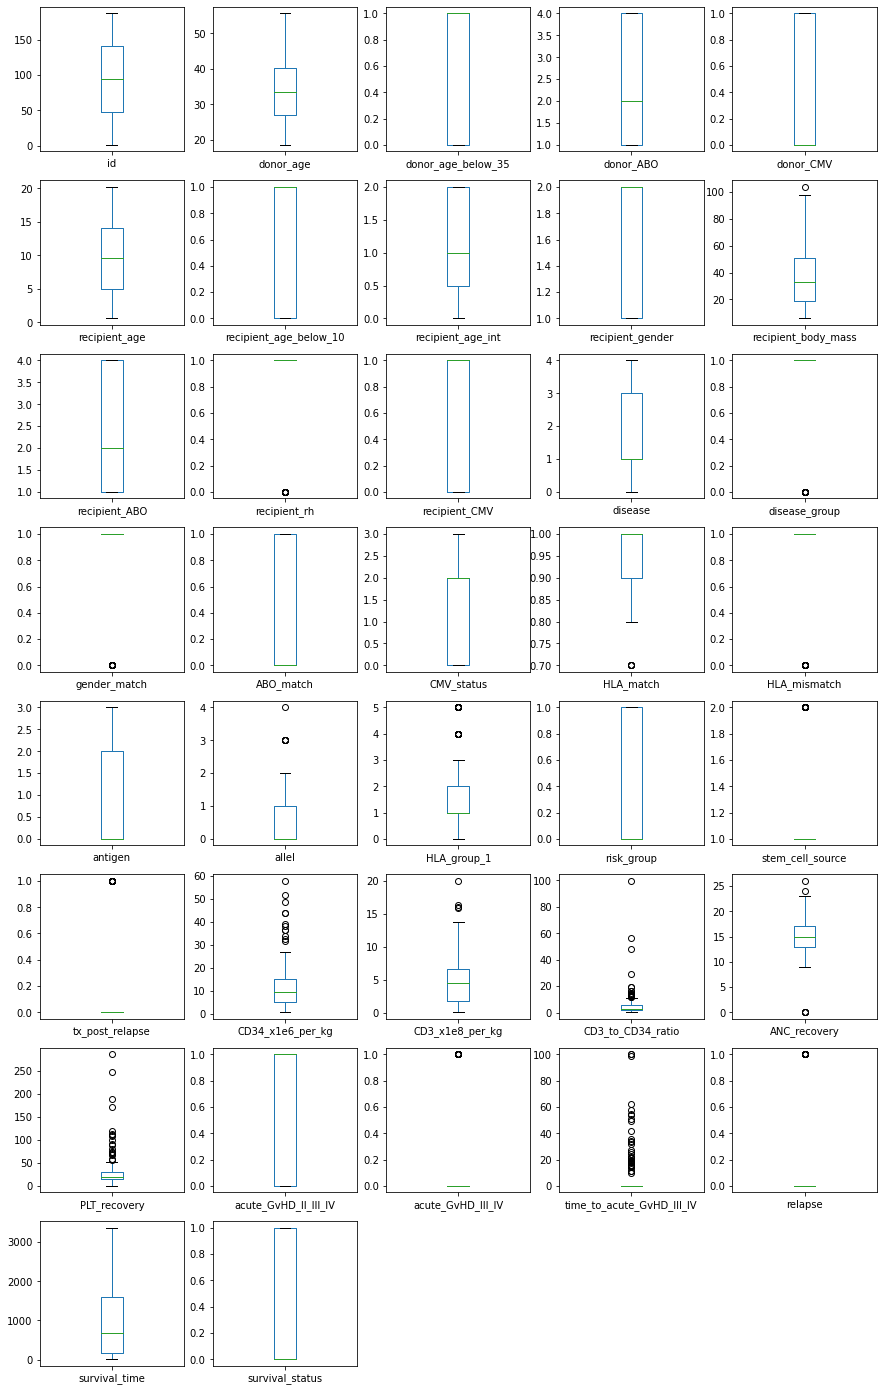

In [43]:
data.plot(kind='box',subplots=True, layout=(8,5), sharex=False, sharey=False, figsize=(15,25))
plt.show()

The variable "time_to_acute_GvHD_III_IV" now contains many 0's so the box plot will be modified. The most common value is 0 while the others are considered outliers. We must take this into consideration when analysing this variable´s boxplot.

Still, a well as for the histograms, some variables´ boxplots don´t make much semnse, e.g., "id", "survival_status", "survival_time".

Instead, the boxplot for **"recipient_body_mass"** does give us a lot of information.

## 5. Dealing with outliers

As mentioned above, we could consider the values equal to 1,000,000 found in the variables ANC_recovery, PLT_recovery and time_to_acute_GvHD_III_IV to be incorrect, however, these values are not erroneous but indicate that the process has not been completed or it has never occurred. 

It is advisable to understand the medical concepts of the variables before studying the data.  

An other example of outliers is in "recipient_body_mass". Here we can see some outliers ranging above 85 kg/m^2. These are for patients 17 and 115.

In [44]:
print('Patient 17:0')
data.loc[[16],['recipient_body_mass', 'survival_status']]

Patient 17:0


,recipient_body_mass,survival_status
16,97.8,1


In [45]:
print('Patient 115:')
data.loc[[114],['recipient_body_mass', 'survival_status']]

Patient 115:


,recipient_body_mass,survival_status
114,90.0,1


These outliers have a medical interpretation and are not erroneous. These two patients have said body mass indexes that seem extremely high in terms of healthy parameters. Seeing it in relationship with the survival status, we see indeed that those patients did not survive the transplantation, maybe as a consequence of non-healthy parameters among other.

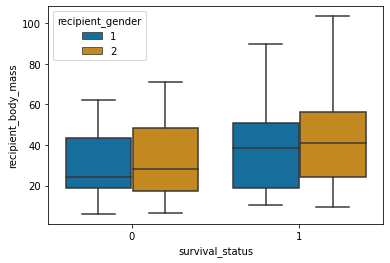

In [46]:
sns.boxplot(y='recipient_body_mass', x='survival_status',  
                 data=data, 
                 palette="colorblind",
                 hue='recipient_gender')

Furthermore, we can say that body mass is an indicator for the surviving probability. In the boxplots we can see that alive patients have a much lower 50% percentile (at ca. 25) than dead patients (ca. 40), which is a considerable difference. This tells us that body mass index is indeed a parameter for the surviving probability. Regarding recipient gender, we can see that men (2) have a broader spectrum regarding body mass than women (1).

We consider no further outliers.

## 6. Normalization 

In [47]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
#scaling each feature to a given range, in this case between 0 and 1. 

# Delete categorical feature 'recipient_age_int' 
data=data.drop(['id'], axis=1)

# All values are now between [0,1]
data_minmax = scaler.fit_transform(data)
scaled_data = pd.DataFrame(data_minmax, columns=data.columns)
scaled_data.describe()


,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.401700,0.556150,0.493761,0.385027,0.476100,0.529412,0.612299,0.598930,0.306619,0.392157,0.855615,0.609626,0.407754,0.828877,0.828877,0.278075,0.516934,0.775401,0.850267,0.306595,0.187166,0.402139,0.368984,0.224599,0.122995,0.194802,0.235370,0.052177,0.573015,0.101154,0.598930,0.213904,0.069733,0.149733,0.277768,0.454545
std,0.224127,0.498171,0.447136,0.487908,0.270696,0.500474,0.412452,0.491431,0.202146,0.405441,0.352423,0.489144,0.290728,0.377627,0.377627,0.449253,0.362742,0.264487,0.357767,0.333151,0.222392,0.288108,0.483825,0.418438,0.329313,0.173967,0.190538,0.095301,0.148722,0.127870,0.491431,0.411161,0.171290,0.357767,0.253005,0.499266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.227414,0.000000,0.000000,0.000000,0.227041,0.000000,0.250000,0.000000,0.136037,0.000000,1.000000,0.000000,0.250000,1.000000,1.000000,0.000000,0.000000,0.666667,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.080014,0.084334,0.016156,0.500000,0.049123,0.000000,0.000000,0.000000,0.000000,0.048392,0.000000
50%,0.403830,1.000000,0.333333,0.000000,0.459184,1.000000,0.500000,1.000000,0.277207,0.333333,1.000000,1.000000,0.250000,1.000000,1.000000,0.000000,0.666667,1.000000,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.156694,0.221722,0.025932,0.576923,0.066667,1.000000,0.000000,0.000000,0.000000,0.199524,0.000000
75%,0.581768,1.000000,1.000000,1.000000,0.686224,1.000000,1.000000,1.000000,0.458932,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.666667,0.250000,0.400000,1.000000,0.000000,0.000000,0.256624,0.327077,0.056033,0.653846,0.101754,1.000000,0.000000,0.000000,0.000000,0.475878,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that all the values have been normalized, they are between 0 and 1. 

In [48]:
scaled_data.head(10)

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time,survival_status
0,0.113355,1.0,0.000000,1.0,0.459184,1.0,0.5,1.0,0.297741,0.000000,1.0,1.0,0.25,1.0,1.0,1.0,1.000000,1.000000,1.0,0.000000,0.00,0.2,1.0,0.0,0.0,0.112476,0.267267,0.011420,0.730769,0.178947,1.0,1.0,0.32,0.0,0.295712,0.0
1,0.127236,1.0,0.333333,0.0,0.173469,1.0,0.0,1.0,0.149897,0.333333,1.0,0.0,0.25,1.0,1.0,1.0,0.000000,1.000000,1.0,0.000000,0.00,0.2,0.0,1.0,0.0,0.065099,0.018519,0.109446,0.615385,0.129825,1.0,0.0,0.00,1.0,0.046754,1.0
2,0.209932,1.0,0.333333,0.0,0.306122,1.0,0.5,1.0,0.178645,0.333333,1.0,1.0,0.25,1.0,1.0,1.0,0.666667,1.000000,1.0,0.000000,0.00,0.2,0.0,1.0,0.0,0.125461,0.019019,0.189309,0.884615,0.070175,1.0,0.0,0.00,1.0,0.127755,1.0
3,0.570039,0.0,0.000000,1.0,0.892857,0.0,1.0,0.0,0.451745,0.666667,1.0,0.0,0.50,1.0,1.0,0.0,0.333333,1.000000,1.0,0.000000,0.00,0.2,0.0,1.0,0.0,0.060712,0.005005,0.294670,0.884615,0.101754,1.0,1.0,0.19,0.0,0.013996,1.0
4,0.398634,1.0,0.000000,0.0,0.035714,1.0,0.0,0.0,0.030801,0.666667,0.0,1.0,0.75,1.0,1.0,0.0,0.000000,0.666667,1.0,0.666667,0.25,0.4,1.0,0.0,0.0,0.895947,0.651151,0.037925,0.538462,0.049123,0.0,0.0,0.00,0.0,0.606611,0.0
5,0.236953,1.0,0.666667,0.0,0.423469,1.0,0.5,1.0,0.349076,1.000000,1.0,1.0,0.75,1.0,1.0,0.0,0.666667,1.000000,1.0,0.000000,0.00,0.2,1.0,1.0,1.0,0.043516,0.017518,0.082618,0.615385,0.245614,0.0,0.0,0.00,0.0,0.832043,0.0
6,0.430109,1.0,1.000000,0.0,0.704082,0.0,1.0,0.0,0.462012,0.000000,0.0,1.0,0.50,1.0,1.0,0.0,0.666667,1.000000,1.0,0.000000,0.00,0.2,0.0,0.0,0.0,0.298122,0.367868,0.022164,0.653846,0.101754,1.0,1.0,0.18,0.0,0.010423,1.0
7,0.075570,1.0,1.000000,1.0,0.897959,0.0,1.0,1.0,0.513347,0.000000,1.0,0.0,0.00,0.0,1.0,0.0,0.333333,0.000000,0.0,0.666667,0.75,0.0,0.0,1.0,0.0,0.098614,0.229870,0.053329,0.846154,0.203509,1.0,1.0,0.22,0.0,0.011614,1.0
8,0.379185,1.0,0.666667,0.0,0.372449,1.0,0.5,1.0,0.148871,1.000000,1.0,1.0,0.00,0.0,1.0,0.0,0.666667,1.000000,1.0,0.000000,0.00,0.2,0.0,0.0,0.0,0.399193,0.310310,0.035915,0.576923,0.049123,0.0,0.0,0.00,0.0,0.198035,0.0
9,0.274664,1.0,0.000000,0.0,0.209184,1.0,0.0,1.0,0.107803,1.000000,1.0,1.0,0.00,0.0,0.0,0.0,0.666667,0.666667,1.0,0.333333,0.50,0.6,0.0,0.0,0.0,0.121074,0.369870,0.008365,0.615385,0.059649,1.0,0.0,0.00,0.0,0.199524,0.0


We consider, that exploring our normalized data doesn´t give us much useful information, taking into account that our database has originally many categorical data.

##  7.  Training, validation and test sets

### Choosing my training data. 
We are dealing with 35 **X** variable and one **Y** variable, the survival status.

In [49]:
#THIS IS MY TRAINIG
x = data[["donor_age", "recipient_age", "ANC_recovery","PLT_recovery","donor_age_below_35","donor_ABO","donor_CMV",
         "recipient_age_below_10","recipient_gender","recipient_body_mass","recipient_ABO","recipient_rh","recipient_CMV",
         "disease","disease_group","gender_match","ABO_match","CMV_status","HLA_match","HLA_mismatch","antigen","allel"
         ,"HLA_group_1","risk_group","stem_cell_source","tx_post_relapse","CD3_x1e8_per_kg","CD34_x1e6_per_kg",
         "CD3_to_CD34_ratio","acute_GvHD_II_III_IV","acute_GvHD_III_IV",
         "relapse","survival_time", "recipient_age_int","time_to_acute_GvHD_III_IV"]] 
y = data["survival_status"]

x.shape, y.shape

((187, 35), (187,))

In [50]:
# Split the data set in two different subsets: training and test

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#HERE I TEST MY DATA. 
x, y = shuffle(x,y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state=0)

In [51]:
print(X_train.shape)
X_train

(140, 35)


,donor_age,recipient_age,ANC_recovery,PLT_recovery,donor_age_below_35,donor_ABO,donor_CMV,recipient_age_below_10,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD3_x1e8_per_kg,CD34_x1e6_per_kg,CD3_to_CD34_ratio,acute_GvHD_II_III_IV,acute_GvHD_III_IV,relapse,survival_time,recipient_age_int,time_to_acute_GvHD_III_IV
13,30.602740,11.5,20.0,48.0,1,4,0,0,2,42.00,1,1,1,4,1,1,0,0.0,1.0,1,0.0,0.0,1,1,2,0,0.850000,3.140,3.713956,1,0,1,335.0,2,0.0
40,34.273973,13.8,15.0,285.0,1,4,1,0,2,48.00,4,1,0,1,1,0,1,1.0,0.9,1,2.0,1.0,3,0,1,0,8.390000,5.810,0.692898,1,0,0,1376.0,2,0.0
136,34.624658,14.7,18.0,51.0,1,4,1,0,2,62.00,2,1,0,1,1,1,0,1.0,1.0,1,0.0,0.0,1,0,2,0,0.050000,2.880,56.065024,0,0,1,996.0,2,0.0
72,26.731507,11.3,17.0,22.0,1,4,1,0,1,46.70,1,1,1,0,0,1,0,3.0,1.0,1,0.0,0.0,1,0,1,0,4.940000,8.820,1.786075,0,0,0,1243.0,2,0.0
74,41.542466,13.5,14.0,14.0,0,3,0,0,1,58.00,4,1,1,3,1,1,0,2.0,1.0,1,0.0,0.0,1,0,1,0,1.240000,14.120,11.405197,1,0,0,1937.0,2,0.0
38,40.536986,2.1,12.0,11.0,0,4,0,1,1,15.00,4,1,1,2,1,1,1,2.0,1.0,1,0.0,0.0,1,0,1,0,3.360000,19.590,5.837647,1,0,0,1690.0,0,0.0
157,19.506849,12.9,17.0,20.0,1,1,0,0,2,40.30,1,1,1,2,1,1,1,2.0,0.9,1,1.0,2.0,3,1,1,1,1.420000,4.220,2.965539,1,0,1,413.0,2,0.0
54,34.169863,6.5,21.0,37.0,1,1,1,1,1,23.00,3,0,1,0,0,1,0,3.0,1.0,1,0.0,0.0,1,0,1,0,8.630000,16.200,1.876834,1,0,0,2036.0,1,0.0
155,29.619178,10.0,16.0,74.0,1,2,0,1,2,55.00,2,1,1,1,1,1,1,2.0,1.0,1,0.0,0.0,1,0,1,0,3.750000,9.370,2.496128,0,0,0,2317.0,2,0.0
37,43.517808,2.2,16.0,16.0,0,4,0,1,1,10.50,2,1,1,3,1,1,0,2.0,0.9,1,2.0,1.0,2,1,1,0,8.060000,22.020,2.733138,0,0,1,149.0,0,0.0


In [52]:
print(X_test.shape)
X_test

(47, 35)


,donor_age,recipient_age,ANC_recovery,PLT_recovery,donor_age_below_35,donor_ABO,donor_CMV,recipient_age_below_10,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD3_x1e8_per_kg,CD34_x1e6_per_kg,CD3_to_CD34_ratio,acute_GvHD_II_III_IV,acute_GvHD_III_IV,relapse,survival_time,recipient_age_int,time_to_acute_GvHD_III_IV
15,41.164384,13.5,17.0,19.0,0,4,1,0,2,30.0,2,1,1,3,1,1,0,3.0,0.9,1,2.0,1.0,2,1,2,0,0.40,4.79,12.028841,0,0,0,3288.0,2,0.0
24,30.504110,6.7,18.0,27.0,1,2,0,1,1,23.8,2,1,0,1,1,1,1,0.0,1.0,1,0.0,0.0,1,0,2,0,0.21,2.87,13.890231,1,1,0,2105.0,1,21.0
29,39.172603,8.4,15.0,23.0,0,1,1,1,1,38.3,1,1,1,1,1,1,1,3.0,1.0,1,0.0,0.0,1,0,1,0,3.17,5.86,1.849607,1,0,1,576.0,1,0.0
170,29.928767,11.2,13.0,16.0,1,1,0,0,2,30.5,4,0,0,2,1,0,0,0.0,0.8,0,2.0,2.0,5,0,1,0,5.16,15.12,2.929514,1,0,0,458.0,2,0.0
12,40.863014,5.1,14.0,37.0,0,4,1,1,2,18.1,1,1,0,1,1,1,0,1.0,1.0,1,0.0,0.0,1,0,1,0,5.64,15.42,2.734654,0,0,0,964.0,1,0.0
73,39.643836,13.5,19.0,27.0,0,1,0,0,1,47.0,4,1,0,4,1,1,0,0.0,0.9,1,2.0,1.0,2,1,2,0,0.29,3.65,12.479226,0,0,0,66.0,2,0.0
135,34.005479,9.0,18.0,46.0,1,4,0,1,1,33.0,4,1,0,1,1,1,1,0.0,0.8,0,2.0,2.0,5,0,1,0,3.08,8.34,2.703806,1,0,0,182.0,1,0.0
52,39.641096,4.9,11.0,51.0,0,2,0,1,2,7.5,1,1,1,0,0,1,0,2.0,0.9,1,2.0,1.0,3,0,1,0,11.85,16.02,1.351711,0,0,0,1346.0,0,0.0
142,43.126027,5.2,16.0,21.0,0,4,1,1,1,20.9,2,1,0,1,1,1,0,1.0,0.9,1,2.0,1.0,2,0,1,0,8.48,6.78,0.799458,0,0,0,1385.0,1,0.0
110,38.827397,7.7,18.0,91.0,0,1,0,1,2,19.5,2,1,1,1,1,1,0,2.0,0.8,0,2.0,2.0,5,1,2,0,0.20,1.28,6.537721,1,1,0,1593.0,1,19.0


In [53]:
print(Y_test.shape)
Y_test

(47,)


15     0
24     0
29     1
170    0
12     0
73     1
135    1
52     0
142    0
110    0
83     1
6      1
169    1
106    1
78     0
49     0
137    1
64     0
1      1
95     0
152    0
119    0
16     1
97     1
25     0
28     0
75     1
100    0
176    0
61     1
122    0
145    0
115    0
80     1
66     1
118    1
39     0
151    0
133    0
156    0
114    1
164    0
70     0
172    1
131    1
168    0
4      0
Name: survival_status, dtype: int64

In [54]:
print(Y_train.shape)
Y_train

(140,)


13     1
40     0
136    1
72     0
74     0
38     0
157    1
54     0
155    0
37     1
19     0
76     1
11     0
150    1
43     1
56     0
81     1
179    0
65     1
102    1
41     1
14     0
111    0
127    0
20     1
30     0
67     1
175    0
22     0
159    0
129    1
103    1
104    1
186    0
5      0
126    0
183    1
21     1
77     1
120    0
3      1
105    0
148    0
36     1
166    0
0      0
69     0
90     0
140    1
89     1
27     1
86     0
60     1
167    0
71     0
162    0
93     1
58     1
160    1
55     0
98     1
182    1
174    0
143    0
85     1
2      1
63     1
47     0
117    0
18     0
125    1
62     0
180    1
42     0
121    1
154    1
53     0
99     1
108    1
107    0
50     0
82     1
116    1
84     1
141    0
26     0
51     0
134    0
45     1
138    1
31     0
177    0
124    0
35     1
79     1
94     0
144    0
57     1
146    1
158    0
161    0
44     0
171    1
185    1
123    1
32     1
91     1
165    1
163    1
17     0
147    0
1

## Changes done in the table 
We made some changes to make the work easier. First, we dropped all the columns that where not float or integers becasause every single variable that is an object has to be changed to a number in order to be normalized.

In [58]:
data_input = data.drop(['recipient_age','survival_status'], axis=1) 
data_output = data['recipient_age']#output I am going to predict 
#the age is the dependent variable 

In [59]:
data_input.head(20)


,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time
0,22.830137,1,1,1,1,1,2,35.0,1,1,1,1,1,1,1,3.0,1.0,1,0.0,0.0,1,1,1,0,7.20,5.380000,1.338760,19.0,51.0,1,1,32.0,0,999.0
1,23.342466,1,2,0,1,0,2,20.6,2,1,0,1,1,1,1,0.0,1.0,1,0.0,0.0,1,0,2,0,4.50,0.410000,11.078295,16.0,37.0,1,0,0.0,1,163.0
2,26.394521,1,2,0,1,1,2,23.4,2,1,1,1,1,1,1,2.0,1.0,1,0.0,0.0,1,0,2,0,7.94,0.420000,19.013230,23.0,20.0,1,0,0.0,1,435.0
3,39.684932,0,1,1,0,2,1,50.0,3,1,0,2,1,1,0,1.0,1.0,1,0.0,0.0,1,0,2,0,4.25,0.140000,29.481647,23.0,29.0,1,1,19.0,0,53.0
4,33.358904,1,1,0,1,0,1,9.0,3,0,1,3,1,1,0,0.0,0.9,1,2.0,1.0,2,1,1,0,51.85,13.050000,3.972255,14.0,14.0,0,0,0.0,0,2043.0
5,27.391781,1,3,0,1,1,2,40.0,4,1,1,3,1,1,0,2.0,1.0,1,0.0,0.0,1,1,2,1,3.27,0.390000,8.412758,16.0,70.0,0,0,0.0,0,2800.0
6,34.520548,1,4,0,0,2,1,51.0,1,0,1,2,1,1,0,2.0,1.0,1,0.0,0.0,1,0,1,0,17.78,7.390000,2.406248,17.0,29.0,1,1,18.0,0,41.0
7,21.435616,1,4,1,0,2,2,56.0,1,1,0,0,0,1,0,1.0,0.7,0,2.0,3.0,0,0,2,0,6.41,4.632805,5.502774,22.0,58.0,1,1,22.0,0,45.0
8,32.641096,1,3,0,1,1,2,20.5,4,1,1,0,0,1,0,2.0,1.0,1,0.0,0.0,1,0,1,0,23.54,6.240000,3.772555,15.0,14.0,0,0,0.0,0,671.0
9,28.783562,1,1,0,1,0,2,16.5,4,1,1,0,0,0,0,2.0,0.9,1,1.0,2.0,3,0,1,0,7.69,7.430000,1.035244,16.0,17.0,1,0,0.0,0,676.0


In [60]:
data_output.head(10)

0     9.6
1     4.0
2     6.6
3    18.1
4     1.3
5     8.9
6    14.4
7    18.2
8     7.9
9     4.7
Name: recipient_age, dtype: float64

In [61]:
#Define the Train (70% of the samples) and Test sets (30% of the samples)
# Random state to obtain always the same results
# For more details, check: https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html
X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, test_size=0.3, random_state = 42)

In [62]:
X_train

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time
127,22.493151,1,4,0,1,0,2,12.0,1,1,1,1,1,1,0,2.0,0.9,1,2.0,1.0,3,0,1,0,20.410,15.900000,1.283387,12.0,12.0,0,0,0.0,0,1301.0
178,37.060274,0,1,0,1,1,2,24.0,1,0,1,2,1,1,1,2.0,0.9,1,1.0,2.0,4,1,1,0,14.430,6.540000,2.205359,12.0,19.0,1,0,0.0,0,1873.0
2,26.394521,1,2,0,1,1,2,23.4,2,1,1,1,1,1,1,2.0,1.0,1,0.0,0.0,1,0,2,0,7.940,0.420000,19.013230,23.0,20.0,1,0,0.0,1,435.0
115,35.797260,0,4,0,1,1,1,26.9,2,1,0,0,0,1,0,0.0,0.9,1,2.0,1.0,2,0,1,0,17.300,2.220000,7.805782,14.0,21.0,1,0,0.0,0,1754.0
46,28.805479,1,4,0,0,2,2,34.1,1,1,1,3,1,0,0,2.0,0.9,1,1.0,2.0,4,1,2,0,3.350,0.740000,4.517296,17.0,25.0,1,1,14.0,0,1006.0
67,47.112329,0,1,1,0,2,1,30.0,1,1,1,3,1,1,1,3.0,0.8,0,2.0,2.0,5,1,1,0,24.340,8.750000,2.780611,15.0,19.0,0,0,0.0,0,606.0
65,45.915068,0,4,0,0,2,1,61.0,1,1,1,1,1,1,0,2.0,0.9,1,2.0,1.0,2,0,2,0,2.340,0.050000,47.869839,16.0,22.0,0,0,0.0,0,55.0
114,37.254795,0,4,1,0,2,1,90.0,4,1,0,3,1,1,1,1.0,0.8,0,3.0,1.0,5,1,1,0,7.000,4.720000,1.483826,12.0,30.0,0,0,0.0,0,57.0
104,25.715068,1,4,0,0,2,2,73.0,4,1,0,3,1,1,1,0.0,1.0,1,0.0,0.0,1,0,1,0,7.100,2.840000,2.498917,12.0,20.0,1,1,58.0,0,534.0
120,33.643836,1,2,0,0,2,2,65.0,2,0,0,1,1,1,1,0.0,1.0,1,0.0,0.0,1,0,1,0,7.970,5.110000,1.558548,19.0,23.0,0,0,0.0,0,718.0


In [63]:
X_test

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,relapse,survival_time
185,27.780822,1,1,0,1,1,2,24.00,4,1,0,3,1,1,0,0.0,0.9,1,2.0,1.0,2,0,1,0,15.41,1.91,8.077770,13.0,14.0,1,1,54.0,0,382.0
78,21.263014,1,2,0,1,1,2,26.50,4,1,1,1,1,1,0,2.0,1.0,1,0.0,0.0,1,0,2,0,3.53,0.84,4.184092,21.0,170.0,0,0,0.0,0,1397.0
55,31.194521,1,3,1,1,0,2,8.15,4,1,1,0,0,1,0,3.0,0.8,0,2.0,2.0,5,0,1,0,57.78,5.24,11.017048,13.0,10.0,0,0,0.0,0,1958.0
137,46.002740,0,2,1,0,2,2,103.40,4,1,1,4,1,1,0,2.0,0.8,0,3.0,1.0,5,1,1,0,1.64,0.17,9.456741,0.0,0.0,0,0,0.0,0,15.0
161,30.421918,1,4,0,1,1,2,24.00,3,0,1,1,1,0,0,2.0,0.9,1,2.0,1.0,2,0,1,0,12.52,9.27,1.350554,14.0,33.0,1,1,18.0,1,1074.0
15,41.164384,0,4,1,0,2,2,30.00,2,1,1,3,1,1,0,3.0,0.9,1,2.0,1.0,2,1,2,0,4.79,0.40,12.028841,17.0,19.0,0,0,0.0,0,3288.0
75,42.268493,0,4,0,0,2,2,56.50,1,1,1,2,1,0,0,2.0,0.9,1,2.0,1.0,2,0,2,0,1.91,0.15,12.365980,16.0,47.0,1,0,0.0,0,435.0
154,25.506849,1,2,0,0,2,1,44.10,2,1,1,1,1,1,1,2.0,0.9,1,2.0,1.0,2,0,2,0,3.53,0.49,7.243234,18.0,37.0,1,0,0.0,0,246.0
122,24.284932,1,4,0,1,0,1,10.50,2,1,0,3,1,1,0,0.0,1.0,1,0.0,0.0,1,0,2,0,4.37,0.97,4.489022,17.0,21.0,1,0,100.0,0,2153.0
175,36.690411,0,1,0,1,0,1,24.00,2,1,1,1,1,1,0,2.0,0.9,1,2.0,1.0,2,0,1,0,7.47,8.85,0.843967,15.0,247.0,1,0,0.0,0,2373.0


In [64]:
r2_results=[]
mse_results=[]
#R2 is used to evaluate how good the model is. 

## 8. Simple Linear Regression

Regression searches for relationships among variables. 
In this trial, we are going to predict the **age of the patient** knowing his **body mass**. The age of the patient will be our dependt variable and his or her body mass our independent variable. 

In [65]:
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Simple linear regression
regressor = LinearRegression()

#Train the model using the training set
regressor = regressor.fit(np.array(X_train['recipient_body_mass']).reshape(-1, 1), Y_train)
#both x train and y train to fit the model. 

# Show the intercept
print(regressor.intercept_)

# Show the coeffients
print(regressor.coef_)

y_pred = regressor.predict(np.array(X_test['recipient_body_mass']).reshape(-1,1))

# Compute the MSE
mse=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse)

# Compute the R2
r_squared=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared)


print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')
print('predicted response:', y_pred, sep='\n')
#Value of y for any x.

1.1268861955754712
[0.25342612]
R Squared: 0.7737032283957148 
 Mean Squared Error:7.384664747364397
predicted response:
[ 7.209113    7.84267829  3.19230905 27.33114669  7.209113    8.7296697
 15.4454618  12.30297795  3.78786042  7.209113    4.42142572  5.00430578
  5.6885563   6.19540853  8.34953053 25.91196043  5.18170407 13.54476593
  4.70019444 17.34615768 16.33245321 10.50365252 11.26393087 10.12351335
  7.15842778 12.02420922  5.30841712 19.1201405   9.48994805  7.56390957
  2.6474429   3.96525871  5.30841712 15.03998001  4.14265699  3.97793001
  7.28514084 16.83930545 14.83723912 13.54476593  7.28514084 10.83310647
 14.12764599 20.38727108 14.93860957  6.95568688  5.71389891  4.92827795
  3.66114736 16.83930545 14.07696077 16.83930545  2.74881334  4.92827795
 14.05161816 17.5995838   5.48581541]


The residual sum of squares (RSS) is a statistical technique used to measure the amount of variance in a data set that is not explained by a regression model itself. Instead, it estimates the variance in the residuals, or error term.

The smaller the residual sum of squares, the better your model fits your data; the greater the residual sum of squares, the poorer your model fits your data.

In [66]:
residuals = Y_test - y_pred
SSR = np.sum(residuals**2)
print(SSR) 

420.92589059977064


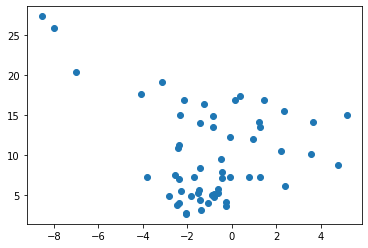

In [67]:
import matplotlib.pyplot as plt

plt.scatter(residuals,y_pred)

plt.show()

## Is this a good model? 

To establish if the model is good or not we have to look at the varaible R squared:

-Rsquared => 0.6 model can be used. 

-Rsquared < 0.6 model should not be used.

Knowing that R squared= 0.774 we can conclude use this good model. 

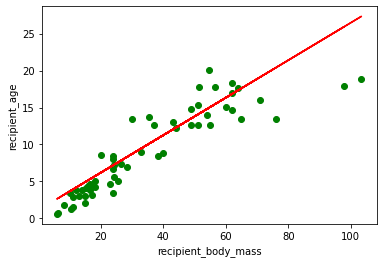

In [68]:
plt.scatter(X_test['recipient_body_mass'],Y_test,color='g')
plt.plot(X_test['recipient_body_mass'], y_pred,color='r')
plt.xlabel('recipient_body_mass')
plt.ylabel("recipient_age")
plt.show()

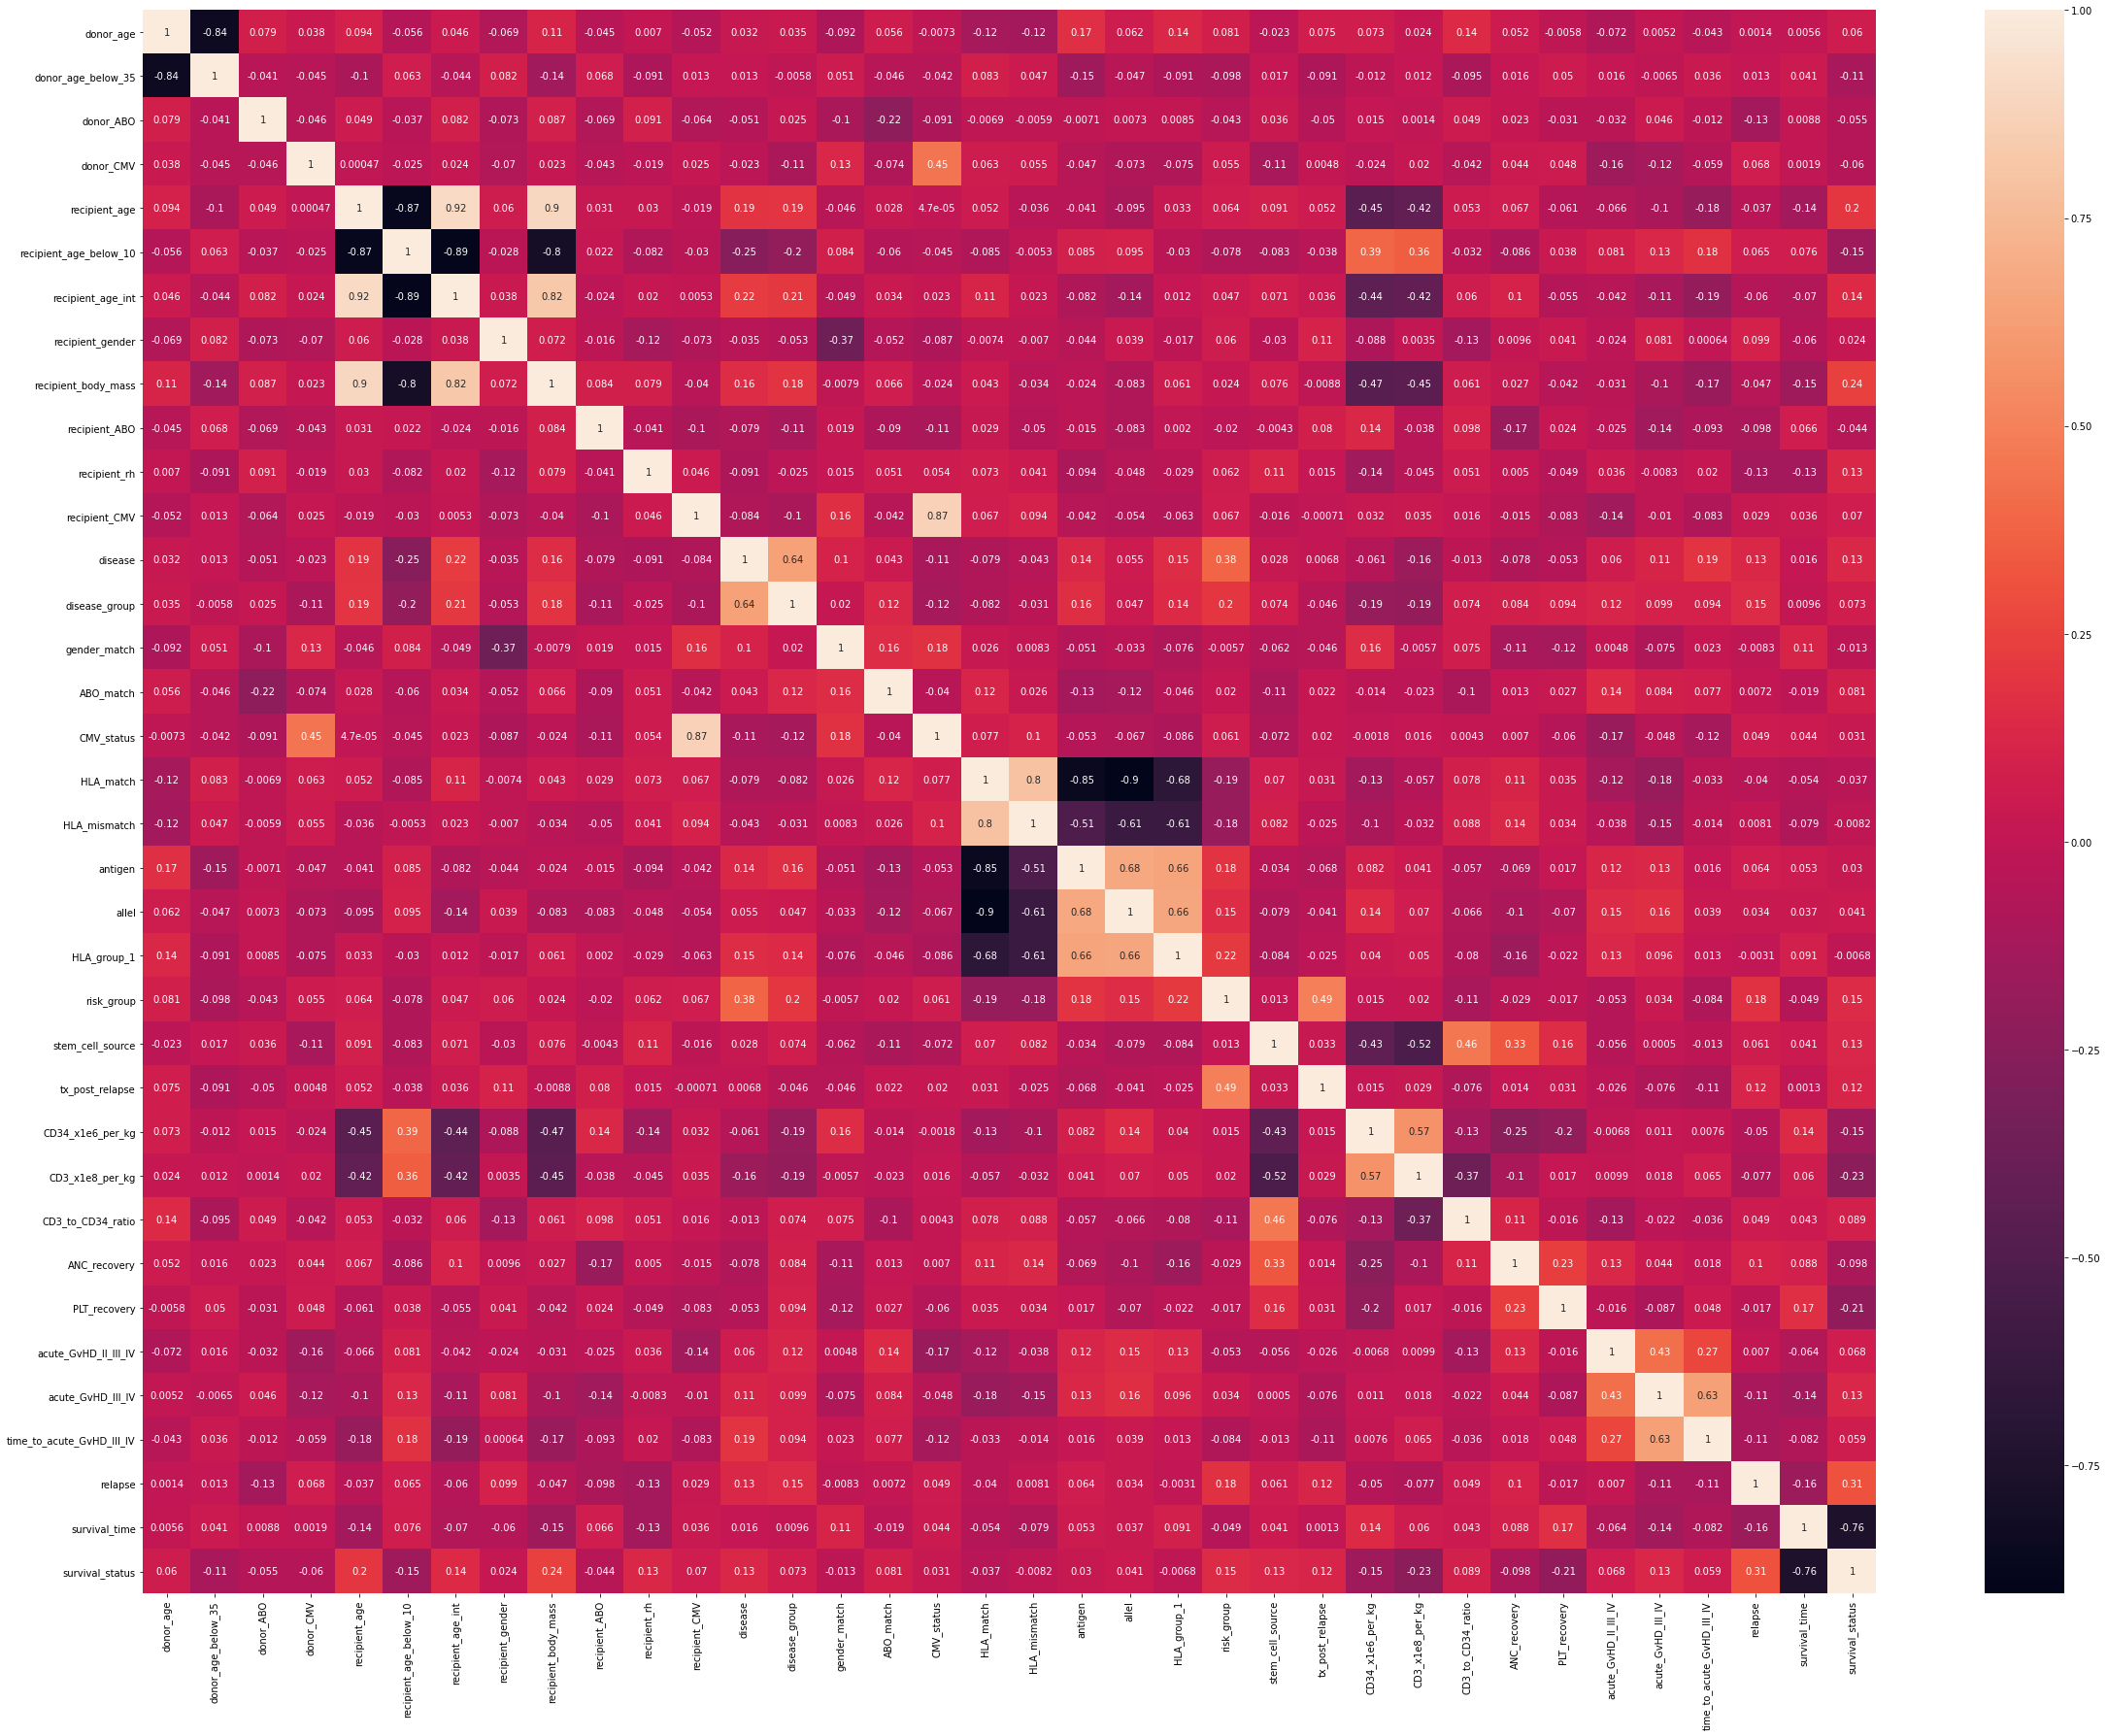

In [69]:
f, ax = plt.subplots(figsize=(40, 30))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

As we want to know the linear relationship between two variables we can look at the pearson correlation matrix. This matrix shows the linear relationship between all the variables, if we wanted to study other type of relationship this matrix could not detect that association.

In the matrix we can see that racipient_age and recipient_body_mass have a strong linear relationship.
According to simple linear regression theory, if two variables show a correlation coefficient greater than 0.8, we can say that they have a strong relationship with each other. 


In [70]:
# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#I HAVE TO USE THIS IF I WANT TO NORMALIZE
scalerfit =  scaler.fit(X_train)
X_train_norm=scaler.transform(X_train)
X_test_norm=scaler.transform(X_test)
#THE TRAIN DATA NORMALIZES THE TEST DATA.


# Simple linear regression
regressor = LinearRegression()

#Train the model using the training set
regressor = regressor.fit(X_train_norm[:,33].reshape(-1, 1), Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coeffients
print(regressor.coef_)

#Predict using the test set
y_pred_lsr = regressor.predict(X_test_norm[:,33].reshape(-1,1))

# Compute the MSE
mse_lsr=metrics.mean_squared_error(Y_test, y_pred_lsr)
mse_results.append(mse_lsr)


# Compute the R2
r_squared_lsr=metrics.r2_score(Y_test, y_pred_lsr)
r2_results.append(r_squared_lsr)

print(f'R Squared: {r_squared_lsr} \n Mean Squared Error:{mse_lsr}')


10.276153846153846
[-0.73776859]
R Squared: -0.021535064627226097 
 Mean Squared Error:33.33540256217443


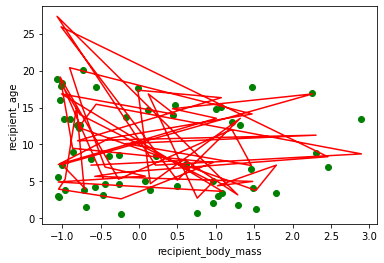

In [71]:
#overfitting
plt.scatter(X_test_norm[:,33],Y_test,color='g')
plt.plot(X_test_norm[:,33], y_pred,color='r')
plt.xlabel('recipient_body_mass')
plt.ylabel("recipient_age")
plt.show()

The model has changed a lot with respect to the non-standardized one.

## 9. Multiple Linear Regresion

In [72]:
# Simple linear regression
regressor = LinearRegression()

#Train the model using the training set
regressor = regressor.fit(X_train_norm, Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coeffients
print(regressor.coef_)

#Predict using the test set
y_pred_mlr = regressor.predict(X_test_norm)

# Compute the MSE
mse_mlr=metrics.mean_squared_error(Y_test, y_pred_mlr)
mse_results.append(mse_mlr)

# Compute the R2
r_squared_mlr=metrics.r2_score(Y_test, y_pred_mlr)
r2_results.append(r_squared_mlr)

print(f'R Squared: {r_squared_mlr} \n Mean Squared Error:{mse_mlr}')
print('predicted response:', y_pred_mlr, sep='\n')


10.276153846153848
[ 1.95281842e-01  4.55853940e-02 -3.53692137e-01 -5.73756626e-01
 -7.77354624e-01  1.96222989e+00 -1.99329595e-01  2.42198187e+00
 -6.57647679e-02 -1.36709395e-01 -9.50925273e-01 -3.07496169e-01
  7.32749665e-02  1.45547332e-01 -2.07832053e-01  7.47296681e-01
 -2.83026075e+00  9.27084726e-01 -1.38070103e+00 -1.28064940e+00
  2.86920925e-01  1.38601790e-01  1.52088221e-01  2.04871094e-01
 -7.17423531e-02  1.87877136e-01 -3.48570096e-02 -2.18971838e-01
  8.59351376e-02 -5.06109118e-04  1.06953116e-01 -1.70866247e-02
  9.67585141e-02 -2.64295253e-01]
R Squared: 0.8897637767848342 
 Mean Squared Error:3.5973007731773263
predicted response:
[ 7.16433532  7.29408377  0.90584821 21.09632959  6.94143175  9.86100506
 14.6150173  13.66365759  2.22662705  5.31034871  2.14315191  3.36768256
  4.61745214  6.87163452  6.16314699 20.81312269  4.16817163 14.30458845
  4.39330745 16.24639188 15.64323152 11.8108522   8.92183229 10.99783155
  7.50668102 11.90950069  3.31830018 17.90495

In [73]:
residuals = Y_test - y_pred
SSR = np.sum(residuals**2)
print(SSR / len(Y_test))

7.384664747364397


With respect to the R^2 value we can conclude that 88% of the values in the table can be predicted by the model. This means that our model is very good. 
Also, calculating the residuals we can conclude that the model is good since its value is low.

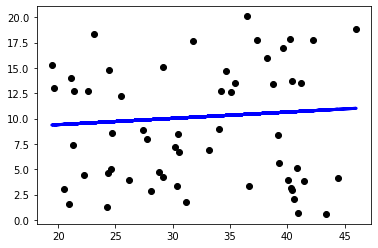

In [74]:
x_train = X_train.values[:,0].reshape(-1, 1)
x_test = X_test.values[:,0].reshape(-1, 1)
simple_reg = LinearRegression()
simple_reg.fit(x_train, Y_train)
y_pred = simple_reg.predict(x_test)
plt.scatter(x_test, Y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

To make sure our model is solid, we need to test the assumptions that linear regression analysis relies upon. Here is an example how to do this for the first independent variable.

In [75]:
x_coef=np.arange(regressor.coef_.shape[0])
print(x_coef)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


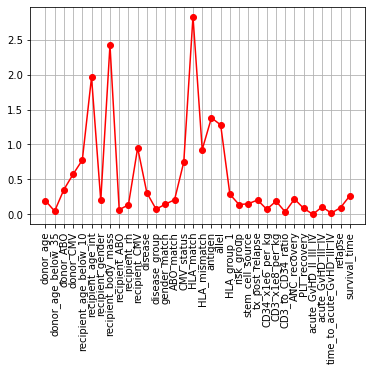

In [76]:
import matplotlib.pyplot as plt 
plt.plot( x_coef, abs(regressor.coef_) ,color='r', marker="o")
plt.xticks(np.arange(regressor.coef_.shape[0]), data_input.columns, rotation=90,  fontsize=10)  # Set text labels and properties.
plt.grid()

In [77]:
import statsmodels.api as sm
mod = sm.OLS(Y_train, X_train_norm)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          recipient_age   R-squared (uncentered):                   0.180
Model:                            OLS   Adj. R-squared (uncentered):             -0.111
Method:                 Least Squares   F-statistic:                             0.6190
Date:                Fri, 05 Nov 2021   Prob (F-statistic):                       0.943
Time:                        18:14:15   Log-Likelihood:                         -488.55
No. Observations:                 130   AIC:                                      1045.
Df Residuals:                      96   BIC:                                      1143.
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 10. Other Regressions

In [78]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

# Values for alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}

# Grid search for ridge regression
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Train 
ridge_regression.fit(X_train_norm, Y_train)

# Best parameters and best score
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)


# Predict
y_pred_ridge = ridge_regression.predict(X_test_norm)

# Compute the MSE
mse_ridge=metrics.mean_squared_error(Y_test, y_pred_ridge)
mse_results.append(mse_ridge)


# Compute the R2
r_squared_ridge=metrics.r2_score(Y_test, y_pred_ridge)
r2_results.append(r_squared_ridge)

print(f'R Squared: {r_squared_ridge} \n Mean Squared Error:{mse_ridge}')


{'alpha': 10}
-3.506739788848192
R Squared: 0.8984059844142053 
 Mean Squared Error:3.3152825827825505


In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# Values for alpha
parameters = {"alpha":[1e-4, 1e-2, 1, 5, 10, 20]}

# Grid search for lasso regression
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Train 
lasso_train=lasso_regression.fit(X_train_norm, Y_train)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

# Predict
y_pred_lasso = lasso_regression.predict(X_test_norm)

# Compute the MSE
mse_lasso=metrics.mean_squared_error(Y_test, y_pred_lasso)
mse_results.append(mse_lasso)


# Compute the R2
r_squared_lasso=metrics.r2_score(Y_test, y_pred_lasso)
r2_results.append(r_squared_lasso)

#Print results
print(f'R Squared: {r_squared_lasso} \n Mean Squared Error:{mse_lasso}')
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred_lasso - Y_test)**2)
print("Mean squared error on test set", mean_squared_error)


{'alpha': 0.01}
-3.600763068479
R Squared: 0.8978802656306295 
 Mean Squared Error:3.332438183105863
Mean squared error on test set 3.3324381831058627


C:\Users\schmi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.99744821157637, tolerance: 0.2545919903846154
  model = cd_fast.enet_coordinate_descent(
C:\Users\schmi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.85724518719647, tolerance: 0.2731756538461539
  model = cd_fast.enet_coordinate_descent(
C:\Users\schmi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.076298906800076, tolerance: 0.27242996153846155
  model = cd_fast.enet_coordinate_descent(
C:\Users\schmi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

In [80]:
results = pd.DataFrame()

results["R2 in the test set"] = r2_results
results["MSE in the test set"] = mse_results

#results
results["Models"] = ["Linear Regression (LR) ", "LR Normalized", "Multiple LR Normalized", "Rigde", "Lasso"] #, "Non-LR Normalized"
results.set_index("Models", inplace = True)
results

,R2 in the test set,MSE in the test set
Models,,
Linear Regression (LR),0.773703,7.384665
LR Normalized,-0.021535,33.335403
Multiple LR Normalized,0.889764,3.597301
Rigde,0.898406,3.315283
Lasso,0.897880,3.332438


Comparing all models and based on R-squared, we can conclude that the most reliable model is the **Ridge model**. One of the best advantages that we can find in the Ridge model is that it reduces the variance. 

## 11. Logistic Regression

Logistic regression is the perfect technique to explain binary variables. In our case we chose relapse as our dependent varaible.  

In [81]:
accuracy=[]
sensitivity=[]
specificty=[]
auc=[]

In [82]:
data_input = data.drop(['survival_status'], axis=1) 
data_output = data['survival_status']
X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, test_size=0.3, random_state = 42)

### Simple Logistic Regression

In [83]:
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


# Logist regression
regressor = LogisticRegression()

# Train the model using X_train
regressor = regressor.fit(np.array(X_train['relapse']).reshape(-1, 1), Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coefficients
print(regressor.coef_)

# Predicted values in the test set
y_pred = regressor.predict(np.array(X_test['relapse']).reshape(-1,1))

y_prob_pred=regressor.predict_proba(np.array(X_test['relapse']).reshape(-1,1))

print(f'Y_pred: {y_pred} ')
print(f'y_prob_pred: {y_prob_pred} ')

[-0.34421844]
[[1.45593083]]
Y_pred: [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0] 
y_prob_pred: [[0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.24755179 0.75244821]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.24755179 0.75244821]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.24755179 0.75244821]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.24755179 0.75244821]
 [0.58521487 0.41478513]
 [0.58521487 0.41478513]
 [0.24755179 0.75244821]
 [0.585

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy
Accuracy=accuracy_score(Y_test, y_pred)
print(f'Accuracy: {Accuracy}')

target_names = ['No Relapse', 'Relapse']
print(classification_report(Y_test, y_pred, target_names=target_names))
              
#Sensibility
Sensitivity=recall_score(Y_test, y_pred)
print(f'Sensitivity or Recall: {Sensitivity}')




[[30  2]
 [17  8]]
tn: 30, fp:2, fn:17, tp:8
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

  No Relapse       0.64      0.94      0.76        32
     Relapse       0.80      0.32      0.46        25

    accuracy                           0.67        57
   macro avg       0.72      0.63      0.61        57
weighted avg       0.71      0.67      0.63        57

Sensitivity or Recall: 0.32


-**Accuracy** refers to how close the result of a measurement is to the true value.

-**Sensitivity** and specificity are two values that indicate the ability of our estimator to discriminate between positive and negative cases.

-**F1** is another widely used metric because it summarises precision and sensitivity in a single metric. 

The values of the main diagonal a=30 and d=8 correspond to the values correctly estimated by the model. The other diagonal therefore represents the cases where the model "got it wrong" (c=17 false negatives_FN, b=2 false positives_FP).

To know if our data is balanced we need the confusion matrix.  
First of all, we must know that the factor **recall or sensitivity** is the one we want to detect, in this case we have 17 failures and 8 successes. 
Do not be fooled by the values of f1, although they seem good, the truth is that **our model is not able to correctly detect fraud cases**. 

**High accuracy and low recall**: the chosen Machine Learning model does not detect the class very well, but when it does it is highly reliable.

### Multiple Logistic Regression

In [85]:
# Normalize

# Logistic regression
regressor = LogisticRegression()

# Train the model using the training data
regressor_lrm = regressor.fit(X_train_norm, Y_train)

# Show the intercept
print(regressor_lrm.intercept_)

# Show the coefficients
print(regressor_lrm.coef_)

# Compute the predicted value in the test set
y_pred_lrm = regressor_lrm.predict(X_test_norm)

#  Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_lrm)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lrm).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Compute the accuracy 
Accuracy=accuracy_score(Y_test, y_pred_lrm)
print(f'Accuracy: {Accuracy}')

target_names = ['No relapse', 'Relapse']
print(classification_report(Y_test, y_pred_lrm, target_names=target_names))
              
#Sensitivity
Sensitivity=recall_score(Y_test, y_pred_lrm)
print(f'Sensitivity: {Sensitivity}')

[-0.79302561]
[[-0.13171291 -0.30460841 -0.08806627 -0.08656416 -0.01066941 -0.275408
  -0.09025717  0.78443047  0.25882707  0.25905211  0.61553789  0.16419262
  -0.20117299 -0.31594444  0.32110959  0.27060977 -0.3094663  -0.23192955
   0.2699711   0.19476501 -0.53845682  0.30453007  0.4104688   0.63200027
   0.06248224 -0.1333646   0.24657775 -0.3149603  -0.98433796  0.25152784
  -0.03578741  0.29980867  0.9922701  -3.14955484]]
[[28  4]
 [ 2 23]]
tn: 28, fp:4, fn:2, tp:23
Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

  No relapse       0.93      0.88      0.90        32
     Relapse       0.85      0.92      0.88        25

    accuracy                           0.89        57
   macro avg       0.89      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57

Sensitivity: 0.92


Considering that simple logistic regression wasn´t able to correctly detect fraud cases and thus, our data seemed unbalanced, we have tried to perform **multiple logistic regression** in order to improve our predictions.

Once done this, we get the results: 

 - We obtain a **Sensitivity of 0.92** and an **Accuracy of 0.89**.
 - Our **confusion matrix** shows us that our results are **balanced**.
 
We conclude that relapse episodes can be predicted under a very acccurate model.

## 12. Pseudopatient
In this section we decided to code a multivariable predictor that would tell us the patient's status according to their body mass index and blood type. 

In [86]:
def pseudopatient():
    
    # Donor age
    D_AGE = input("Enter donor´s age: ")

    if D_AGE == '':
        D_below35 = input("Is the donor´s age below 35? [yes:1 / no:0] ")
    elif float(D_AGE) < 35:
        D_below35 = 1
    else:
        D_below35 = 0

    # Recipient age
    R_age = input("Enter recipient´s age (lower than 20): ")

    if R_age == '':
        R_below10 = input("Is the recipient´s age below 10? [yes:1 / no:0] ")
    elif float(R_age) < 10:
        R_below10 = 1
    else:
        R_below10 = 0

    # Blood groups
    D_ABO = input("Enter donor's blood group: [A:1 / B:2 / AB:3 / 0:4] ")
    R_ABO = input("Enter recipient's blood group, remember: [A:1 / B:2 / AB:3 / 0:4] ")

    if D_ABO == '' or R_ABO == '':
        ABO_match = input("Compatibility of the donor and the recipient of hematopoietic stem cells according to AB0 blood group [matched:1 / mismatched:0]: )")
    elif D_ABO == R_ABO:
        ABO_match = 1
    else:
        ABO_match = 0

    # CMV
    D_CMV = input("Presence of cytomegalovirus infection in the donor of hematopoietic stem cells prior to transplantation? [yes:1/no:0] ")
    R_CMV = input("Presence of cytomegalovirus infection in the recipient of hematopoietic stem cells prior to transplantation? [yes:1 / no:0] ")
    CMV_status = input("Serological compatibility of the donor and the recipient of hematopoietic stem cells according to cytomegalovirus infection prior to transplantation (the higher the value the lower the compatibility) [scale: 0 (no comatibility) to 3 (high compatibility)]: ")

    # Recipient other variables
    R_gender = input("Enter recipient´s gender [female:1 / male:2]: ")
    R_BMI = input("Enter recipient's BMI: ")
    R_rh = input("Presence of the Rh factor on recipient’s red blood cells [plus:1 / minus:0]")
    disease = input("Type of disease [nonmalignant:0 / ALL:1 / AML:2 / chronic:3 / lymphoma:4]: ")
    risk_group = input("If patient belongs to high risk group enter 1, if not enter 0: ")
    relapse = input("Has the patient had a relapse of the disease? [yes:1 / no:0] ")
    
    
    variables = {'donor_age':D_AGE, 'donor_age_below_35':D_below35, 'recipient_age':R_age, 'recipient_age_below_10':R_below10,
            'donor_ABO':D_ABO, 'recipient_ABO':R_ABO, 'ABO_match':ABO_match, 'donor_CMV':D_CMV, 'recipient_CMV':R_CMV,
            'CMV_status':CMV_status, 'recipient_gender':R_gender, 'recipient_body_mass':R_BMI, 'recipient_rh':R_rh,
            'disease':disease, 'risk_group':risk_group, 'relapse':relapse}
    
    
    data_entered = []
    values_entered = []
    
    for i, val in variables.items():
        if val != '':
            data_entered.append(i)
            values_entered.append(float(val))
        else:
            pass

    results = dict(zip(data_entered, values_entered))
    print('\nResults: ', results)
    
    
    import pandas
    from sklearn import linear_model

    #X = data[['recipient_body_mass', 'recipient_ABO', 'recipient_age']]
    X = data[data_entered]
    y = data['survival_status']

    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    p = regr.predict([values_entered])
    rounded = [np.round(x) for x in p]
    
    return rounded

In [ ]:
pseudopatient()